In [1]:
from network_model import NetworkAgingModel
from utils import pickle_save, get_device, pickle_load, calc_mort
# import networks as nwks
import numpy as np
import torch
import time
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networks as nw
import networkx as nx

In [2]:
# # change font
# mpl.rcParams['font.sans-serif'] = "Arial"
# mpl.rcParams['font.family'] = "sans-serif"
# plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# paths
basepath = Path("./")
outpath = basepath / "figures" / "figure_1"
outpath.mkdir(exist_ok=True, parents=True)

In [4]:
# enumerate cases
networks=["star",
           "line",
            "branching",
            "directed_SFN",
            "directed_SFN",
            "erdos_reyni",
            "erdos_reyni",
            "full"]
sf_m=[0, 0, 0, 2, 50, 0, 0, 0]
er_p=[0, 0, 0, 0, 0, 0.1, 0.5, 0]

pi_repairs = [1e-4, 1e-3]
etas = [0, 0.2]

In [5]:
# load results and plot
network = networks[0]
sf_m_value = sf_m[0]
er_p_value = er_p[0]
repair_prob = pi_repairs[0]
eta = etas[0]

network_results = Path("./network_results")
respath = network_results / f"{network}_SFm_{sf_m_value}_ERp_{er_p_value}_repair_{repair_prob}_eta_{eta}" / "results.pkl"
results = pickle_load(respath)

In [6]:
results.keys()

dict_keys(['t95', 'dead_times', 'survival', 'mortality', 'final_state'])

In [7]:
mort = results['mortality']

In [8]:
mort.shape

(4,)

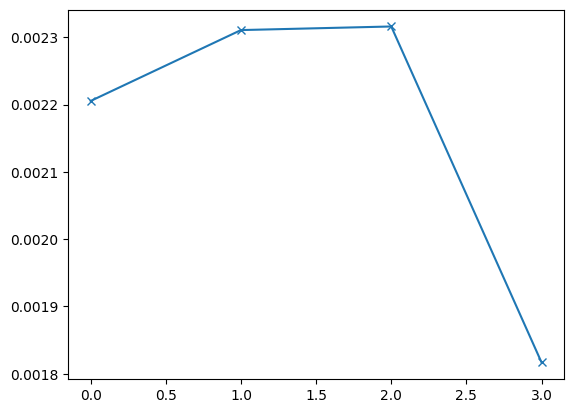

In [9]:
fig, ax = plt.subplots()
ax.plot(mort, '-x')

In [10]:
## plot full network results

In [11]:
# def calc_mort_networks(res, w=11, p=1):
#     dtimes = res['dead_times']
#     surv = res['survival']
#     num_organisms = dtimes.shape[0]
#     times = np.arange(len(surv))
#     surv95_threshold = 0.05*num_organisms

#     tsurv = times[surv>surv95_threshold] # times upto t95 (where >95% alive)
#     if len(tsurv) == 0:
#         raise ValueError("no t95!")
#     t95 = len(tsurv)
#     dt = 1 #max(int(np.std(dtimes)*0.25),1)
#     s95 = surv[:t95]

#     if w > 0:
#         smoothed = savgol_filter(s95, window_length=w, polyorder=p)
#         dsurvdt = savgol_filter(s95, window_length=w, polyorder=p, deriv=1, delta=dt)
        
#         mort = -dsurvdt/smoothed
#     else:
#         nt_mort = len(s95)-dt
#         mort = np.zeros(nt_mort)
#         for i in range(nt_mort):
#             mort[i] = -(s95[i+dt]-s95[i])/(s95[i]*dt)
#     return mort

(1000,)
(5000,)
(2000,)
(5000,)
(5000,)
(5000,)
(10000,)
(5000,)
(50000,)
(5000,)


(1e-05, 10.0)

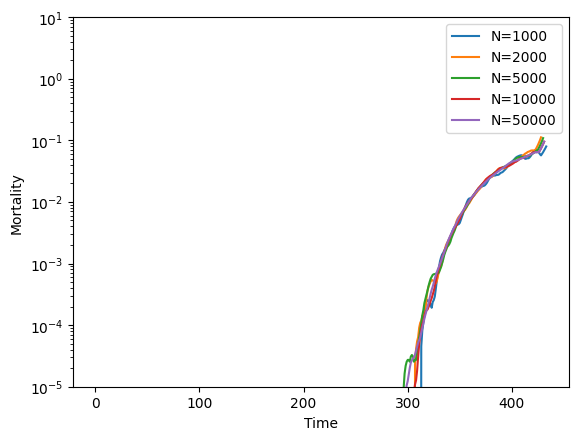

In [12]:
# load results and plot
network = 'full'
sf_m_value = 0
er_p_value = 0
repair_prob = 0.001
eta = 0

nvals = [1000, 2000, 5000, 10000, 50000] #, 100000]

fig, ax = plt.subplots()
for nval in nvals:
    network_results = Path("./network_results_tests")
    respath = network_results / f"{network}_SFm_{sf_m_value}_ERp_{er_p_value}_repair_{repair_prob}_eta_{eta}_N_{nval}" / "results.pkl"
    results = pickle_load(respath)

    dtimes = results['dead_times']
    surv = results['survival']
    print(dtimes.shape)
    print(surv.shape)

    # mort = results['mortality']
    #! calculate mortality ...
    t, mort, normmort = calc_mort(results)
    ax.plot(mort, '-', label=f"N={nval}")
    ax.legend()
    ax.set_xlabel("Time")
    ax.set_ylabel("Mortality")
ax.set_yscale("log")
ax.set_ylim(1e-5, 1e1)

In [13]:
results.keys()

dict_keys(['t95', 'dead_times', 'survival', 'mortality', 'final_state'])

In [14]:
t, mort, normmort = calc_mort(results)

In [15]:
print(np.amax(mort))
print(np.amin(mort))
print(np.mean(mort))

0.09533128
-1.5446567e-17
0.0070683295


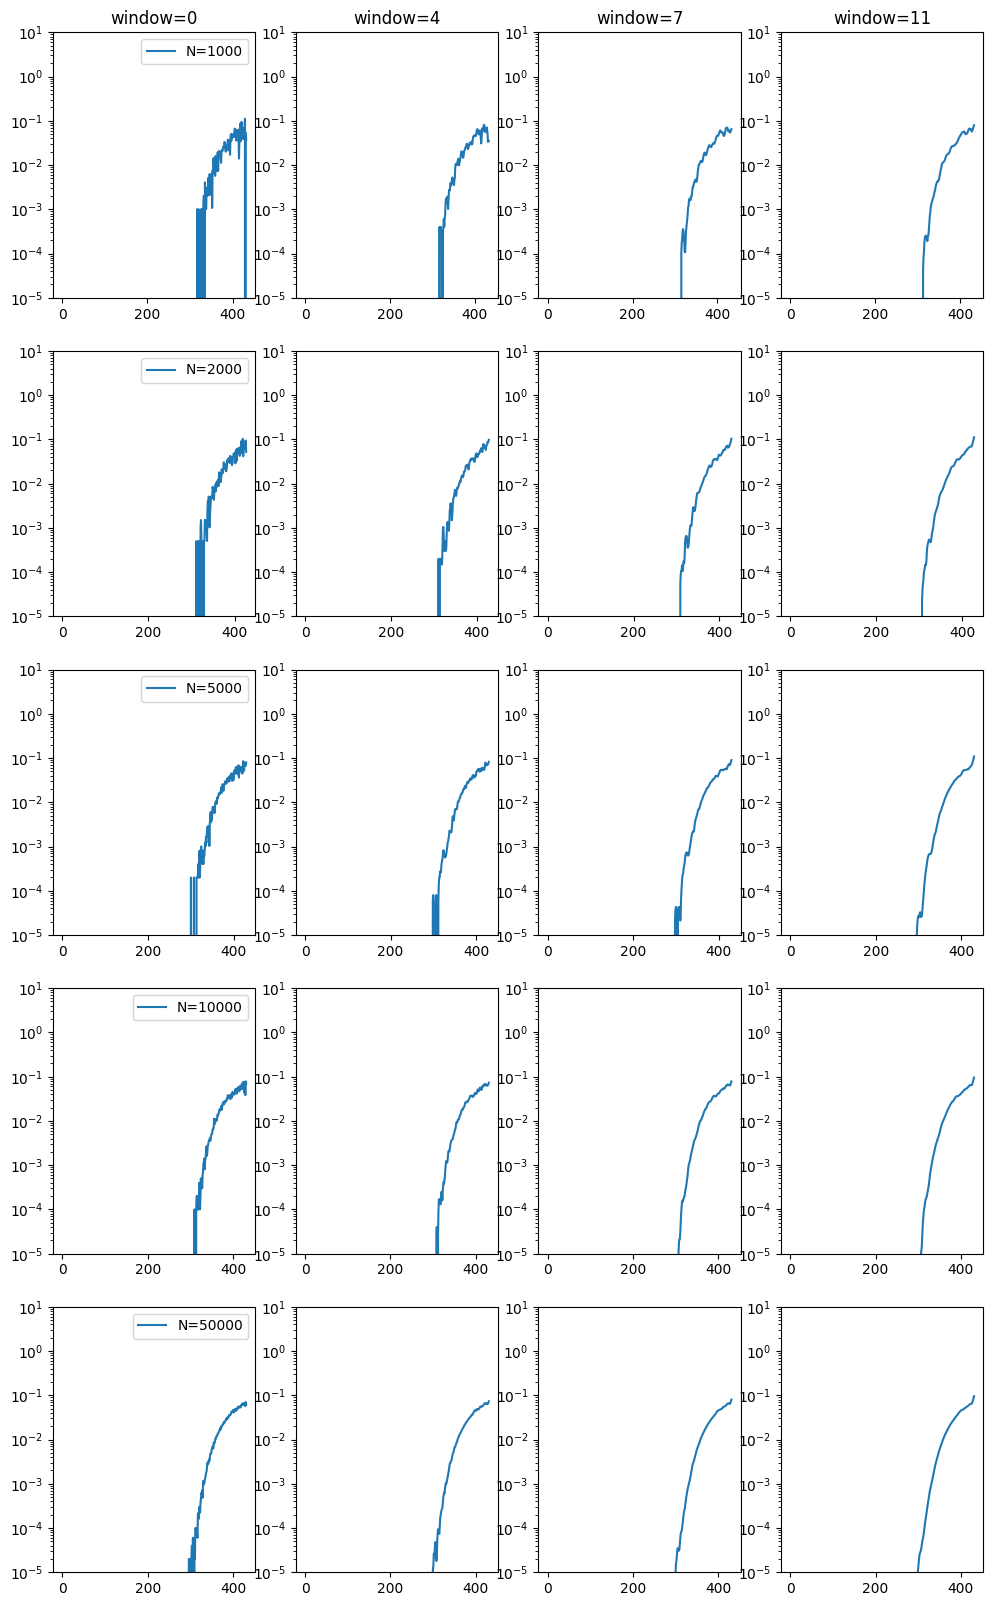

In [16]:
# load results and plot
network = 'full'
sf_m_value = 0
er_p_value = 0
repair_prob = 0.001
eta = 0

windows = [0, 4, 7, 11]
nvals = [1000, 2000, 5000, 10000, 50000] #, 100000]

fig, ax = plt.subplots(ncols=len(windows), nrows=len(nvals), figsize=(12,20))
for i, nval in enumerate(nvals):
    network_results = Path("./network_results_tests")
    respath = network_results / f"{network}_SFm_{sf_m_value}_ERp_{er_p_value}_repair_{repair_prob}_eta_{eta}_N_{nval}" / "results.pkl"
    results = pickle_load(respath)
    # mort = results['mortality']
    #! calculate mortality ...
    for j, w in enumerate(windows):
        t, mort, normmort = calc_mort(results, w=w)
        ax[i, j].plot(mort, '-', label=f"N={nval}")
        # ax[i, j].legend()
        ax[i, j].set_yscale("log")
        ax[i, j].set_ylim(1e-5, 1e1)
        ax[0, j].set_title(f"window={w}")
        if j == 0:
            ax[i, j].legend()
        
#     ax[i].set_title(f"window={w}")
#     for nval in nvals:
#         network_results = Path("./network_results_tests")
#         respath = network_results / f"{network}_SFm_{sf_m_value}_ERp_{er_p_value}_repair_{repair_prob}_eta_{eta}_N_{nval}" / "results.pkl"
#         results = pickle_load(respath)
#         # mort = results['mortality']
#         #! calculate mortality ...
#         mort = calc_mort_networks(results, w=w)
#         ax[i].plot(mort, '-', label=f"N={nval}")
#         ax[i].legend()
#         ax[i].set_xlabel("Time")
#         ax[i].set_ylabel("Mortality")
#     ax[i].set_yscale("log")
#     ax[i].set_ylim(1e-5, 1e1)
# # for nval in nvals:
# #     network_results = Path("./network_results_tests")
# #     respath = network_results / f"{network}_SFm_{sf_m_value}_ERp_{er_p_value}_repair_{repair_prob}_eta_{eta}_N_{nval}" / "results.pkl"
# #     results = pickle_load(respath)

# #     dtimes = results['dead_times']
# #     surv = results['survival']
# #     print(dtimes.shape)
# #     print(surv.shape)

# #     # mort = results['mortality']
# #     #! calculate mortality ...
# #     mort = calc_mort_networks(results)
# #     ax.plot(mort, '-', label=f"N={nval}")
# #     ax.legend()
# #     ax.set_xlabel("Time")
# #     ax.set_ylabel("Mortality")
# # ax.set_yscale("log")
# # ax.set_ylim(1e-5, 1e1)